In this project, we will create a classification model using fruit and vegetable images labeled its own species, obtained from Kaggle.com.We will use Keras deep learning. Then we will save our model. We will integrate the model into our website that we prepared with Streamlit library. When we give a new fruit or veg image, the model will predict which of the 36 types of fruits or vegs it belongs to.

# Fruit and Veg Detection - Classification

<img src='https://www.eskitadinda.com/img/saglikli_yasam/2/organik-meyve-sebzelerin-farki-nedir_262_2.jpg' >

<a href='https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition/data'>Click here to reach dataset<a>

### Import Dataset

In [1]:
import cv2
import os
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
train_dir = Path('/kaggle/input/fruit-and-vegetable-image-recognition/train')
train_filepaths = list(train_dir.glob(r'**/*.jpg'))

test_dir = Path('/kaggle/input/fruit-and-vegetable-image-recognition/test')
test_filepaths = list(test_dir.glob(r'**/*.jpg'))

val_dir = Path('/kaggle/input/fruit-and-vegetable-image-recognition/validation')
val_filepaths = list(test_dir.glob(r'**/*.jpg'))

In [4]:
def create_dataframe(filepaths):
    data = {'img': [str(filepath) for filepath in filepaths],
            'label': [Path(filepath).parent.name for filepath in filepaths]}
    return pd.DataFrame(data)

df_train = create_dataframe(train_filepaths)
df_test = create_dataframe(test_filepaths)
df_val = create_dataframe(val_filepaths)

In [5]:
df_train.sample(5)

,img,label
2673,/kaggle/input/fruit-and-vegetable-image-recogn...,spinach
1608,/kaggle/input/fruit-and-vegetable-image-recogn...,lemon
2357,/kaggle/input/fruit-and-vegetable-image-recogn...,mango
2671,/kaggle/input/fruit-and-vegetable-image-recogn...,spinach
1192,/kaggle/input/fruit-and-vegetable-image-recogn...,beetroot


In [6]:
df_test.sample(5)

,img,label
7,/kaggle/input/fruit-and-vegetable-image-recogn...,capsicum
162,/kaggle/input/fruit-and-vegetable-image-recogn...,pear
276,/kaggle/input/fruit-and-vegetable-image-recogn...,watermelon
65,/kaggle/input/fruit-and-vegetable-image-recogn...,pomegranate
328,/kaggle/input/fruit-and-vegetable-image-recogn...,soy beans


In [7]:
df_val.sample(5)

,img,label
220,/kaggle/input/fruit-and-vegetable-image-recogn...,grapes
331,/kaggle/input/fruit-and-vegetable-image-recogn...,soy beans
276,/kaggle/input/fruit-and-vegetable-image-recogn...,watermelon
91,/kaggle/input/fruit-and-vegetable-image-recogn...,jalepeno
248,/kaggle/input/fruit-and-vegetable-image-recogn...,banana


In [8]:
df= pd.concat([df_train,df_val])
df.reset_index(drop=True,inplace=True)
df_train.info(),df_val.info(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2780 entries, 0 to 2779
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   img     2780 non-null   object
 1   label   2780 non-null   object
dtypes: object(2)
memory usage: 43.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   img     334 non-null    object
 1   label   334 non-null    object
dtypes: object(2)
memory usage: 5.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   img     3114 non-null   object
 1   label   3114 non-null   object
dtypes: object(2)
memory usage: 48.8+ KB


(None, None, None)

In [9]:
df.head()

,img,label
0,/kaggle/input/fruit-and-vegetable-image-recogn...,capsicum
1,/kaggle/input/fruit-and-vegetable-image-recogn...,capsicum
2,/kaggle/input/fruit-and-vegetable-image-recogn...,capsicum
3,/kaggle/input/fruit-and-vegetable-image-recogn...,capsicum
4,/kaggle/input/fruit-and-vegetable-image-recogn...,capsicum


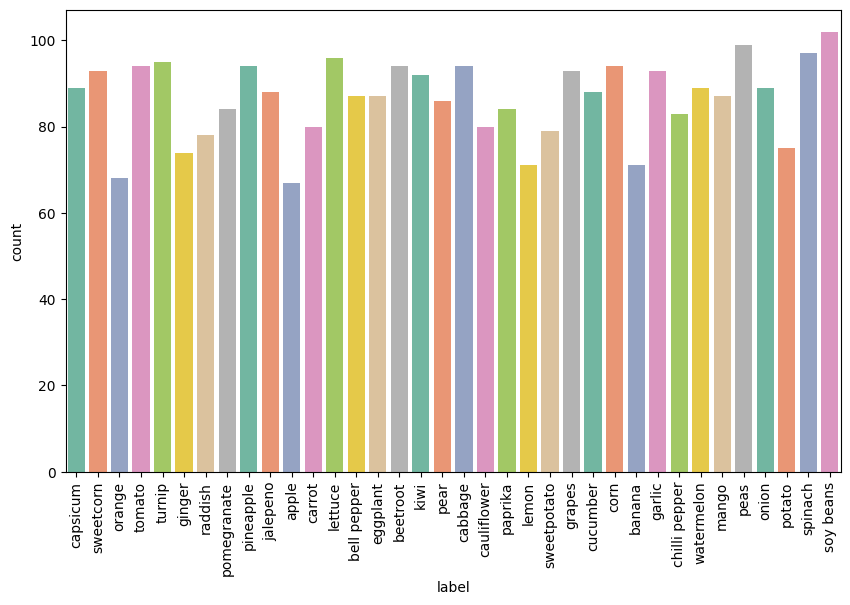

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(x='label',data=df,palette='Set2')
plt.xticks(rotation=90);

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['encode_label'] = encoder.fit_transform(df['label'])

In [12]:
df.sample(5)

,img,label,encode_label
34,/kaggle/input/fruit-and-vegetable-image-recogn...,capsicum,5
1411,/kaggle/input/fruit-and-vegetable-image-recogn...,cabbage,4
2746,/kaggle/input/fruit-and-vegetable-image-recogn...,soy beans,29
1321,/kaggle/input/fruit-and-vegetable-image-recogn...,pear,23
2593,/kaggle/input/fruit-and-vegetable-image-recogn...,potato,27


In [13]:
df['label'].value_counts()

label
soy beans        102
peas              99
spinach           97
lettuce           96
turnip            95
cabbage           94
beetroot          94
tomato            94
corn              94
pineapple         94
sweetcorn         93
garlic            93
grapes            93
kiwi              92
onion             89
capsicum          89
watermelon        89
jalepeno          88
cucumber          88
eggplant          87
bell pepper       87
mango             87
pear              86
paprika           84
pomegranate       84
chilli pepper     83
cauliflower       80
carrot            80
sweetpotato       79
raddish           78
potato            75
ginger            74
lemon             71
banana            71
orange            68
apple             67
Name: count, dtype: int64

In [14]:
df['label'].nunique()

36

In [15]:
label_dict = dict(zip(df['encode_label'], df['label']))
sorted_label_dict = dict(sorted(label_dict.items()))
output = ',\n'.join([f"{key}:'{value}'" for key, value in sorted_label_dict.items()])

print(output)

0:'apple',
1:'banana',
2:'beetroot',
3:'bell pepper',
4:'cabbage',
5:'capsicum',
6:'carrot',
7:'cauliflower',
8:'chilli pepper',
9:'corn',
10:'cucumber',
11:'eggplant',
12:'garlic',
13:'ginger',
14:'grapes',
15:'jalepeno',
16:'kiwi',
17:'lemon',
18:'lettuce',
19:'mango',
20:'onion',
21:'orange',
22:'paprika',
23:'pear',
24:'peas',
25:'pineapple',
26:'pomegranate',
27:'potato',
28:'raddish',
29:'soy beans',
30:'spinach',
31:'sweetcorn',
32:'sweetpotato',
33:'tomato',
34:'turnip',
35:'watermelon'


### Deep Learning

We will identify x and y datas.

In [16]:
import cv2

x = []
failed_images = []

for idx, img_path in enumerate(df['img']):
    try:
        img = cv2.imread(img_path)
        if img is None:
            raise ValueError(f"Image could not be loaded: {img_path}")
        
        img = cv2.resize(img, (170, 170))
        img = img / 255.0
        x.append(img)
    
    except Exception as e:
        # Hata veren dosya yolunu kaydediyoruz
        print(f"Error occurred: {e} - File: {img_path}")
        failed_images.append(idx)  # Hata veren satırın indeksini kaydediyoruz

# Hata veren satırları df'den çıkaralım
if failed_images:
    df = df.drop(failed_images, axis=0).reset_index(drop=True)
    print(f"{len(failed_images)} rows were removed. Remaining rows: {df.shape[0]}")
else:
    print("No rows removed, all data is valid.")

Error occurred: Image could not be loaded: /kaggle/input/fruit-and-vegetable-image-recognition/train/bell pepper/Image_56.jpg - File: /kaggle/input/fruit-and-vegetable-image-recognition/train/bell pepper/Image_56.jpg
1 rows were removed. Remaining rows: 3113


In [17]:
x=np.array(x)

In [18]:
y=df['encode_label']

Let's import train test split and we will split%20 of our datas as test data.

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

CNN - Convolutional Neural Networks

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D,Dropout,BatchNormalization,Reshape
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [22]:
model = Sequential()
model.add(Input(shape=(170, 170, 3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(36, activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True    
)

datagen.fit(x_train)

In [23]:
history = model.fit(x_train,y_train,epochs=40, validation_data=(x_test,y_test),verbose=1)

Epoch 1/40


I0000 00:00:1728783607.991434     102 service.cc:145] XLA service 0x7a66580064f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728783607.991488     102 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1728783607.991493     102 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 5/78 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.0684 - loss: 3.6021

I0000 00:00:1728783617.003308     102 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


78/78 ━━━━━━━━━━━━━━━━━━━━ 24s 170ms/step - accuracy: 0.0457 - loss: 3.5659 - val_accuracy: 0.0738 - val_loss: 3.2507
Epoch 2/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.0981 - loss: 3.1617 - val_accuracy: 0.1669 - val_loss: 2.8384
Epoch 3/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.1681 - loss: 2.8577 - val_accuracy: 0.2311 - val_loss: 2.5341
Epoch 4/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.2169 - loss: 2.6282 - val_accuracy: 0.3162 - val_loss: 2.2799
Epoch 5/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.2930 - loss: 2.3800 - val_accuracy: 0.3274 - val_loss: 2.2203
Epoch 6/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.3100 - loss: 2.2521 - val_accuracy: 0.3772 - val_loss: 2.0597
Epoch 7/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.3888 - loss: 2.0625 - val_accuracy: 0.3820 - val_loss: 2.0366
Epoch 8/40
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4182 - loss: 1.9834 - val_accuracy: 0.3997 - val_loss: 

In [24]:
model.save('fruit_veg_model.h5')

We trained and saved our model.Now we can use it in any algorithm.

## Transfer Learning

We trained a new model from scratch using CNN. However, we can also achieve our goal by using pre-trained models and providing them with our own data. Among the pre-trained models, the most widely used in the field of image processing are the ResNet50 and VGG16 models. Here, we will use the VGG16 model.

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D,Dropout,BatchNormalization,Reshape
from tensorflow.keras.applications import VGG16,ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
train_dir = Path('/kaggle/input/fruit-and-vegetable-image-recognition/train')
val_dir = Path('/kaggle/input/fruit-and-vegetable-image-recognition/validation')

img_width,img_heigth=32,32

train_datagen=ImageDataGenerator(rescale=1/255)

train_datagenerator=train_datagen.flow_from_directory(directory=train_dir,target_size=(img_width,img_heigth),
                                class_mode='categorical')

val_datagen=ImageDataGenerator(rescale=1/255)
val_datagenerator=val_datagen.flow_from_directory(directory=val_dir,target_size=(img_width,img_heigth),
                                class_mode='categorical')

base_model=VGG16(weights='imagenet', input_shape=(img_width,img_heigth,3),include_top=False)
model=Sequential()

model.add(base_model)
for layer in base_model.layers:
    layer.trainable=False

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(36,activation='sigmoid'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(train_datagenerator,epochs=15,validation_data=val_datagenerator)

Found 3115 images belonging to 36 classes.
Found 351 images belonging to 36 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 98s 924ms/step - accuracy: 0.1402 - loss: 3.2662 - val_accuracy: 0.4473 - val_loss: 2.0450
Epoch 2/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 80s 757ms/step - accuracy: 0.3665 - loss: 2.2605 - val_accuracy: 0.5783 - val_loss: 1.6301
Epoch 3/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 80s 767ms/step - accuracy: 0.4582 - loss: 1.9007 - val_accuracy: 0.6553 - val_loss: 1.3754
Epoch 4/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 80s 764ms/step - accuracy: 0.5019 - loss: 1.6969 - val_accuracy: 0.6581 - val_loss: 1.2439
Epoch 5/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 80s 767ms/step - accuracy: 0.5750 - loss: 1.4966 - val_accuracy: 0.7464 - val_loss: 1.0576
Epoch 6/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 81s 769ms/step - accuracy: 0.6260 - loss: 1.3022 - val_accuracy: 0.7721 - val_loss: 0.9580
Epoch 7/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 80s 771ms/step - accuracy: 0.6743 - loss: 1.1622 - v

In [27]:
model.save('fruit_veg_tf_model.h5')

### Conclusion

We turned the file paths of the fruits and veg images obtained from Kaggle.com into a DataFrame with the help of the Pandas and OS libraries. Then, we sequentially read all the images using the OpenCV library and normalized them for easier processing. Afterward, we trained our model using Keras deep learning. As a second step, we used the VGG16 model by feeding our data into it, training the pre-trained model with our data, and making it suitable for our purpose. Both methods can be used for Image Classification, but since training a model from scratch is a time-consuming process, the common approach is to use a pre-trained model and apply transfer learning.